AGD VS HBD

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

Visulaize function and its hessian

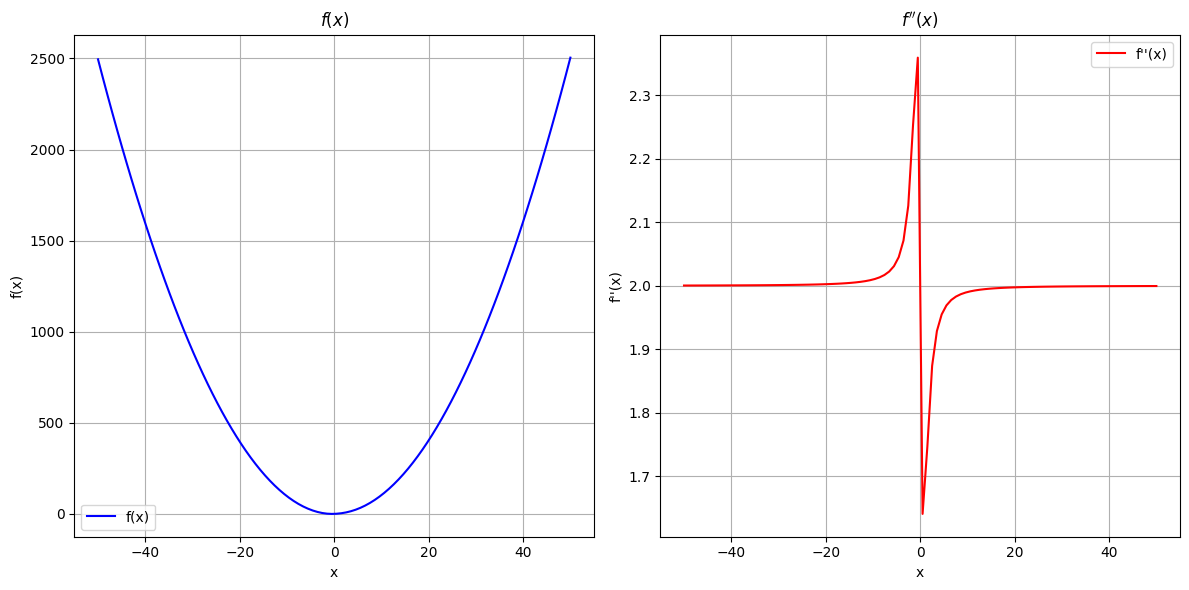

In [55]:
def f(x):
    return np.log(x + np.sqrt(1 + x**2)) + x**2

def gradf(x):
    return (1 + x / np.sqrt(1 + x**2)) / (x + np.sqrt(1 + x**2)) + 2 * x

def hessianf(x):
    return ( 2 - (x/(1 + x**2)**1.5))


X = np.linspace(-50, 50, 100)


fx = [f(x) for x in X]
hessianx = [hessianf(x) for x in X]

# Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(X, fx, label="f(x)", color="blue")
plt.title("$f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(X, hessianx, label="f''(x)", color="red")
plt.title("$f''(x)$")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

    Params

In [66]:
x0 = 1.0   #initial condition
L = 2.38   # calculation in assignment
alpha = 1/L  ##optimum taken
beta = 0.1   # Momentum 
u = 1.61   # calculation in assignment

AGD 

In [70]:
def AGD(x0, grad_f, L, u, max_iter=1000, tol=1e-10):
    x = x0
    y = 0
    prev_steps = [x0]
    
    for k in range(max_iter): ##start from 1
        adaptive_gain = (np.sqrt(L) - np.sqrt(u))/(np.sqrt(L) + np.sqrt(u))
        y = x + adaptive_gain * (x_next - x) if k !=0 else 0  ##update momentum
        x_next = y - (1 / L) * grad_f(y) ## update x with grad momentum
    
        prev_steps.append(x_next)
        
        if np.linalg.norm(x_next - x) < tol:
            break
        
        x = x_next
    
    return x, prev_steps

HB

In [71]:
def HB(x0, grad_f, alpha, beta, max_iter=1000, tol=1e-10):
    x = x0
    y = 0
    prev_steps = [x0]
    
    for k in range(max_iter):
        y = beta * (x_next - x) if k != 0 else 0 ##compute momentum
        x_next = x - alpha * grad_f(x) + y ##update
        
        prev_steps.append(x_next)
        
        if np.linalg.norm(x_next - x) < tol:
            break
        
        x = x_next
    
    return x, prev_steps

Results

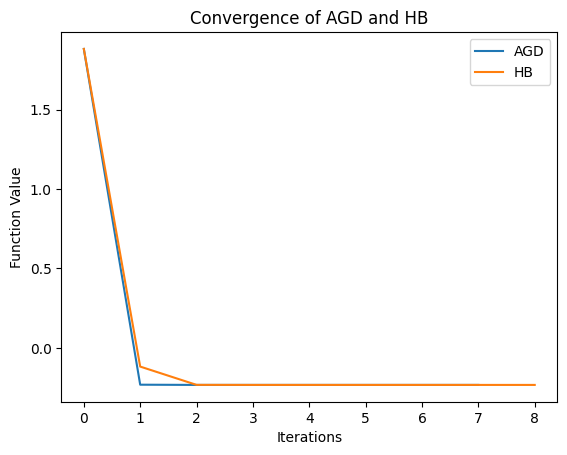

AGD converged to -0.45508986052531 in 8 iterations
HB converged to -0.455089860545869 in 9 iterations


In [73]:
agd_x, agd_steps = AGD(x0, gradf, L, u)
hb_x, hb_steps = HB(x0, gradf, alpha, beta)

# Plot convergence
plt.plot(range(len(agd_history)), [f(x) for x in agd_history], label="AGD")
plt.plot(range(len(hb_history)), [f(x) for x in hb_history], label="HB")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.title("Convergence of AGD and HB")
plt.legend()
plt.show()

# Print results
print(f"AGD converged to {agd_x} in {len(agd_steps)} iterations")
print(f"HB converged to {hb_x} in {len(hb_steps)} iterations")